#NLP ressarcimento  busca de ressarcimento nas descrições do sinistro.

#### Carraegar Dados

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from functools import reduce
import pickle
import warnings
warnings.filterwarnings("ignore")

In [ ]:
##from google.colab import files
#uploaded = files.upload()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving classificacoo de texto.png to classificacoo de texto.png


In [ ]:
read_file = pd.read_excel('base de descrições.xlsx')
print(read_file)


###### Ler excel

In [ ]:
read_file.to_csv (r'base_de_descricoes.csv', index = None, header=True)

###### Gerar csv

In [ ]:
colnames=['DESCRICAO', 'GRAU', 'SITUAÇÃO DO SINISTRO']
df_01 = pd.read_csv("base_de_descricoes.csv" , usecols=colnames)
df_01.head(50)

In [ ]:
df_01.shape

(87995, 3)

In [ ]:
#Agrupar as categorias
df_01['SITUAÇÃO DO SINISTRO'].value_counts()

BAIXADO SEM RESSARCIMENTO    78268
BAIXADO COM RESSARCIMENTO     7611
SEGURADO CULPADO              2116
Name: SITUAÇÃO DO SINISTRO, dtype: int64

In [ ]:
df_02 = df_01

In [ ]:
df_02['SITUAÇÃO DO SINISTRO'] = df_02['SITUAÇÃO DO SINISTRO'].replace('SEGURADO CULPADO', 'BAIXADO COM RESSARCIMENTO')

In [ ]:
df_02['SITUAÇÃO DO SINISTRO'].value_counts()

BAIXADO SEM RESSARCIMENTO    78268
BAIXADO COM RESSARCIMENTO     9727
Name: SITUAÇÃO DO SINISTRO, dtype: int64

### Análise Exploratória e Limpeza

In [ ]:
def show_null(df):
    null_columns = (df.isnull().sum(axis=0)/len(df)).sort_values(ascending=False).index

    null_data = pd.concat([df.isnull().sum(axis=0),
                           (df.isnull().sum(axis=0)/len(df)).sort_values(ascending=False),
                           df.loc[:, df.columns.isin(list(null_columns))].dtypes],
                          axis=1)

    null_data = null_data.rename(columns={0: '#',
                                          1: '% null',
                                          2: 'type'}).sort_values(ascending=False,
                                                                  by='% null')

    return null_data

In [ ]:
def plot_num(df, feature):
    fig = plt.figure(figsize=(12,8))
    gs = GridSpec(1,2)
    sns.countplot(x=feature, data=df, color='firebrick', ax=fig.add_subplot(gs[0,0]))
    plt.xlabel(feature)
    sns.stripplot(x=df[feature], color='darkcyan', ax=fig.add_subplot(gs[0,1]))
    plt.xlabel(None)
    plt.show()


In [ ]:
def plot_cat(df, feature):
    fig = plt.figure(figsize=(12,8))
    ax = sns.countplot(data=df, x=feature)
    for p in ax.patches:

        ax.annotate(f'\n{p.get_height()}',
                    (p.get_x()+0.4, p.get_height()+5),
                    ha='center',
                    color='black')

    plt.xlabel('\n' + feature)
    plt.ylabel('Quantidade de Clientes')
    plt.show()

In [ ]:
show_null(df_02)

,#,% null,type
DESCRICAO,0,0.0,object
GRAU,0,0.0,object
SITUAÇÃO DO SINISTRO,0,0.0,object


In [ ]:
df_02.dropna(inplace=True)

In [ ]:
show_null(df_02)

,#,% null,type
DESCRICAO,0,0.0,object
GRAU,0,0.0,object
SITUAÇÃO DO SINISTRO,0,0.0,object


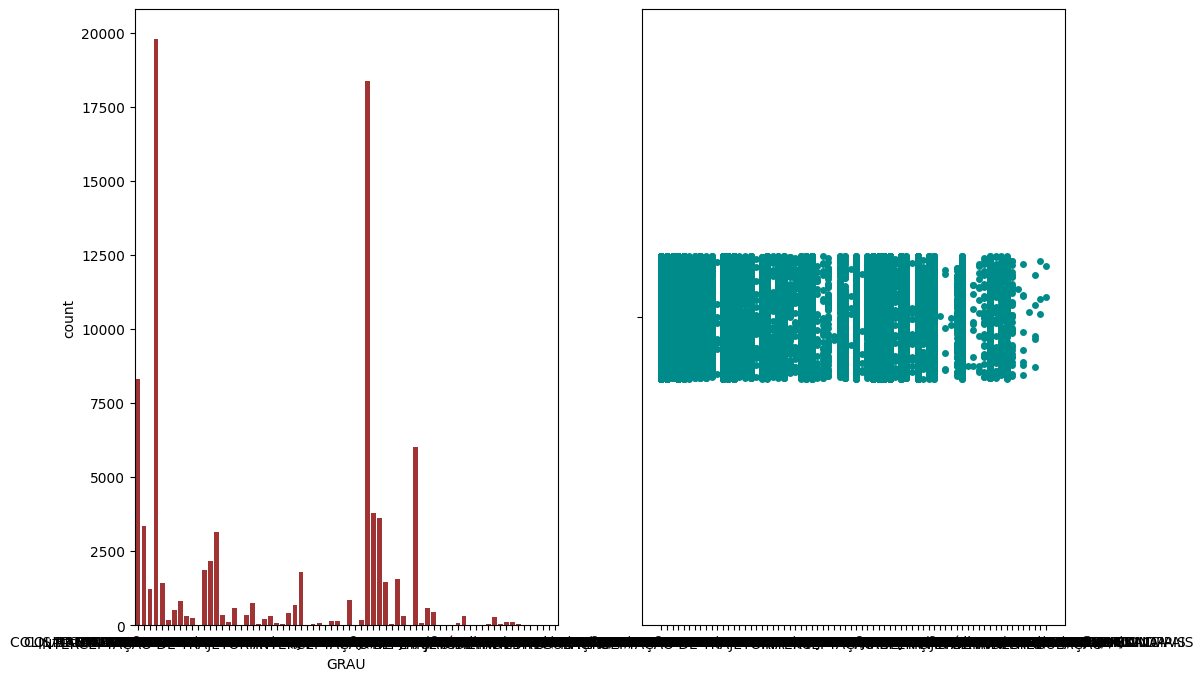

In [ ]:
plot_num(df_02, 'GRAU')

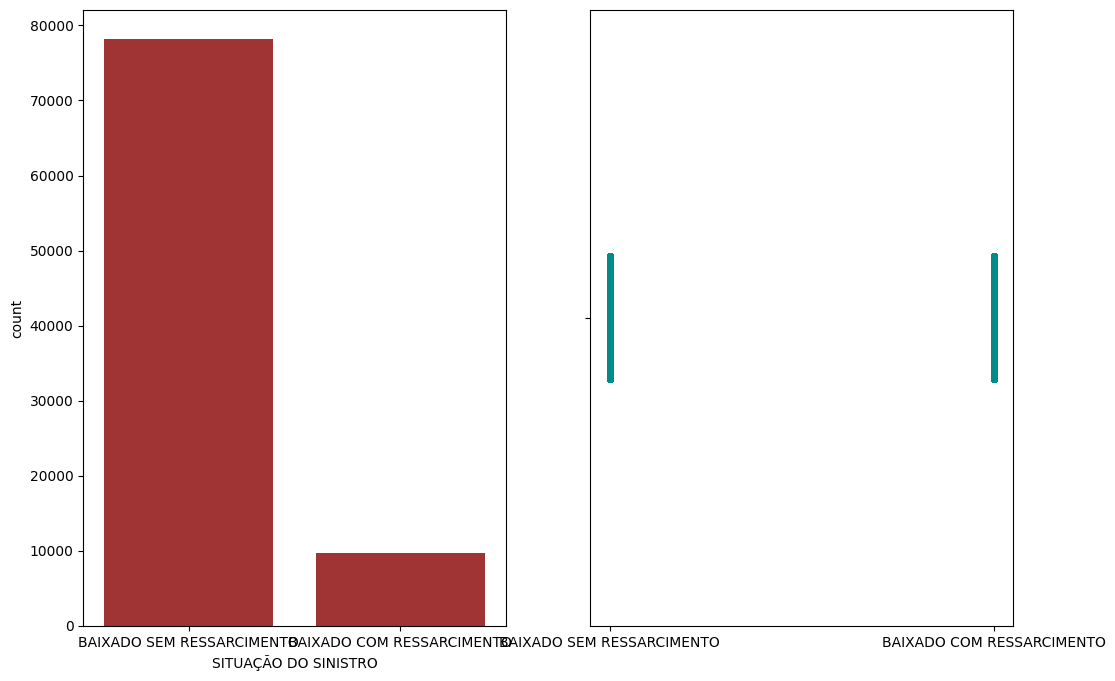

In [ ]:
plot_num(df_02, 'SITUAÇÃO DO SINISTRO')

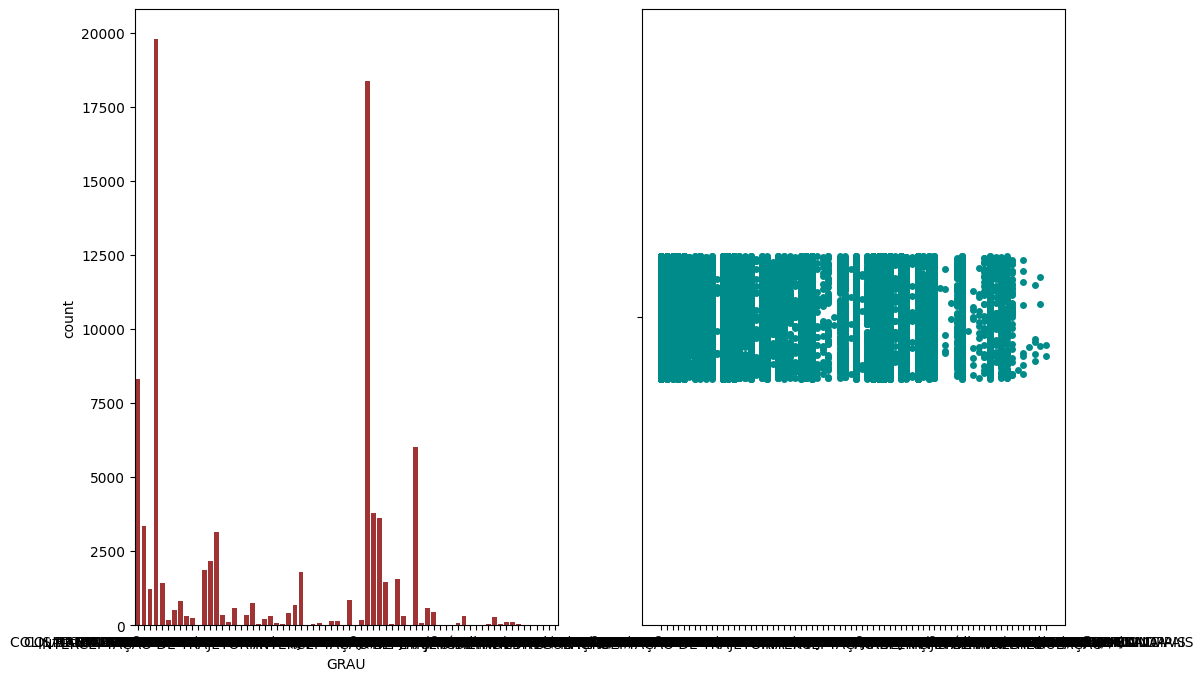

In [ ]:
plot_num(df_02, 'GRAU')

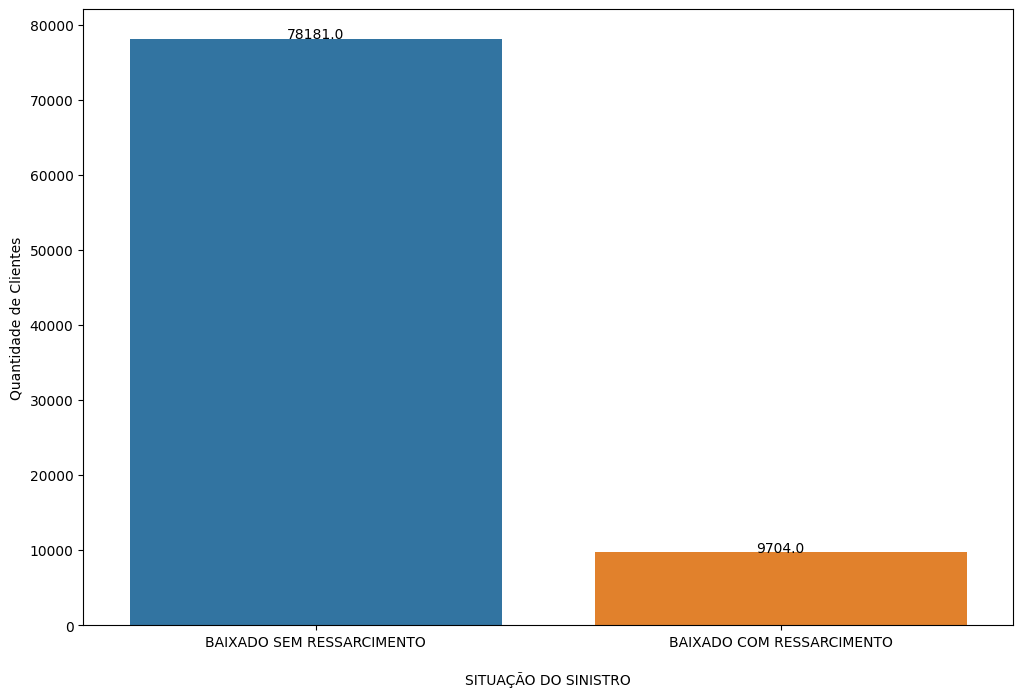

In [ ]:
plot_cat(df_02, 'SITUAÇÃO DO SINISTRO')

### Machine Learning e Deep Learning para NLP na Prática

#### Introdução: classificação de texto

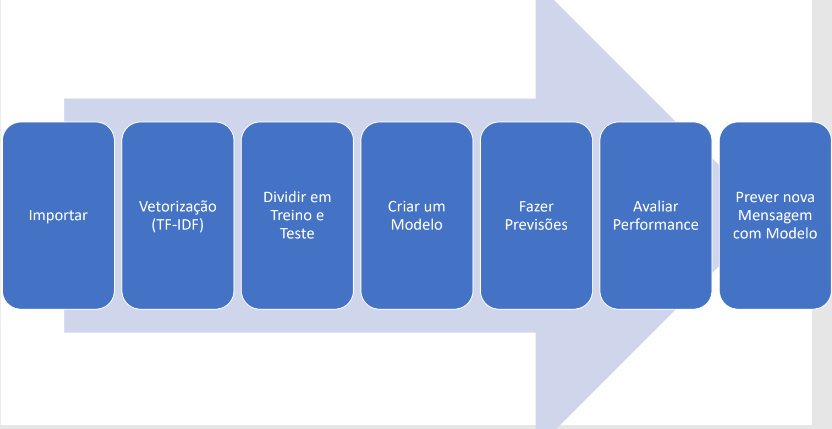

In [ ]:
Image(filename='classificacoo de texto.png', width=1000, height=500)

##### Imports

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df_02.shape

(87885, 3)

#### Classificação de ressarcimento parte 1

In [ ]:
#Agrupar as categorias
df_02['SITUAÇÃO DO SINISTRO'].value_counts()

BAIXADO SEM RESSARCIMENTO    78181
BAIXADO COM RESSARCIMENTO     9704
Name: SITUAÇÃO DO SINISTRO, dtype: int64

In [ ]:
previ = df_02['DESCRICAO']
classe = df_02['SITUAÇÃO DO SINISTRO']

In [ ]:
vetorizador = TfidfVectorizer()
previsores = vetorizador.fit_transform(previ)
print(previsores.shape)

(87885, 69860)


In [ ]:
print(vetorizador.get_feature_names_out()[10:100])

['0000323495' '0000325240' '0000365519' '0000390725' '0000419109'
 '0000511917' '0000535042' '0000598831' '0000609680' '0000619896'
 '000064627' '0000654389' '0000691361' '0000717866' '0000801063'
 '0000922925' '0000949470' '00009562662019' '0000966231' '0001'
 '0001009593' '0001040524' '0001075127' '0001080589' '0001083271'
 '0001121920' '0001232142' '0001264154' '0001559658' '0001621908'
 '0001678792' '0001778309' '0001784259' '00017890162021' '0001837129'
 '0002' '0002013474' '0002152743' '0002321540' '0002492606' '0003'
 '0003982' '00074' '000segurado' '001' '0010' '00115400621' '00123154395'
 '001272' '0016' '0017' '0019' '00196545780' '002' '0021' '002138738'
 '0022' '00220717702' '0023' '00233637265' '0024' '0025' '0027' '0028'
 '00281147316' '00287608646' '003' '00304217050' '00304751751'
 '00328328642' '00328864760' '0033' '00341' '0035' '0036' '00374334269'
 '0038' '00389278106' '0039' '004' '0040' '0041' '00411638777' '0042'
 '0044' '00450526879' '00456104216' '0046' '0049' 

#### Classificação de ressarcimento parte 2

In [ ]:
#X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size=0.3)

In [ ]:
#X_teste.shape

In [ ]:
#floresta = RandomForestClassifier(n_estimators=500)
#floresta.fit(X_treinamento,y_treinamento)

In [ ]:
#previsoes = floresta.predict(X_teste)
#print(previsoes)

In [ ]:
#print(confusion_matrix(y_teste, previsoes))

In [ ]:
#print(accuracy_score(y_teste, previsoes))
#print(metrics.classification_report(y_teste, previsoes))

In [ ]:
#df_02.head(100)

In [ ]:
#mensagem = df_02['DESCRICAO'][99]
#mensagem

In [ ]:
#mensagem = [mensagem]
#mensagem = vetorizador.transform(mensagem)
#previsao = floresta.predict(mensagem)
#print(previsao)

#### Classificação com Redes Neurais


#### Implementando uma Rede Neural Parte 1

##### Imports

In [ ]:
df_02

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
from google.colab import files
import numpy as np

##### Transformar texto em numeros

In [ ]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(df_02['SITUAÇÃO DO SINISTRO'])
print(y)

[1 1 1 ... 1 1 1]


In [ ]:
mensagens = df_02['DESCRICAO'].values
X_train, X_test, y_train, y_test = train_test_split(mensagens, y, test_size=0.3)
print(X_train)

In [ ]:
vetorizador = CountVectorizer()
vetorizador.fit(X_train)
X_train = vetorizador.transform(X_train)
X_test = vetorizador.transform(X_test)
print(X_train.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
np.set_printoptions(threshold=np.inf)

In [ ]:
#X_train.toarray()[0]

In [ ]:
print(X_train.shape[1])

55684


#### Implementando uma Rede Neural Parte 2

In [ ]:
modelo = Sequential()
modelo.add(Dense(units=10,activation="relu",input_dim=X_train.shape[1]))
modelo.add(Dropout(0.1))
modelo.add(Dense(units=8,activation="relu")) ##  0 0u 1
modelo.add(Dropout(0.1))
modelo.add(Dense(units=1,activation="sigmoid")) #Camada de saida atua na probabilidade de ser 0 0u 1

#### Implementando uma Rede Neural Parte 3

In [ ]:
modelo.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                556850    
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 556,947
Trainable params: 556,947
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo.fit(X_train, y_train,epochs=10,batch_size=10, verbose=True, validation_data=(X_test, y_test))

Epoch 1/10
6152/6152 [==============================] - 58s 9ms/step - loss: 0.0969 - accuracy: 0.8893 - val_loss: 0.0930 - val_accuracy: 0.8902
Epoch 2/10
6152/6152 [==============================] - 57s 9ms/step - loss: 0.0895 - accuracy: 0.8893 - val_loss: 0.0934 - val_accuracy: 0.8902
Epoch 3/10
6152/6152 [==============================] - 57s 9ms/step - loss: 0.0848 - accuracy: 0.8893 - val_loss: 0.0967 - val_accuracy: 0.8902
Epoch 4/10
6152/6152 [==============================] - 58s 9ms/step - loss: 0.0798 - accuracy: 0.8927 - val_loss: 0.1001 - val_accuracy: 0.8747
Epoch 5/10
6152/6152 [==============================] - 59s 10ms/step - loss: 0.0752 - accuracy: 0.8998 - val_loss: 0.1020 - val_accuracy: 0.8734
Epoch 6/10
6152/6152 [==============================] - 55s 9ms/step - loss: 0.0706 - accuracy: 0.9070 - val_loss: 0.1048 - val_accuracy: 0.8668
Epoch 7/10
6152/6152 [==============================] - 56s 9ms/step - loss: 0.0662 - accuracy: 0.9136 - val_loss: 0.1069 - val_a

In [ ]:
loss, accuracy = modelo.evaluate(X_test,y_test)
print("Loss: ", loss)
print("Acurácia: ", accuracy)

824/824 [==============================] - 2s 2ms/step - loss: 0.1116 - accuracy: 0.8589
Loss:  0.11162768304347992
Acurácia:  0.8589091897010803


In [ ]:
nova_previsao = modelo.predict(X_test)
#print(nova_previsao)

In [ ]:
prev = (nova_previsao > 0.5)
#print(prev)

In [ ]:
cm = confusion_matrix(y_test, prev)
print(cm)

 #20 [[  729  2138]
 #[ 2772 20727]]

[[  313  2583]
 [ 1137 22333]]


#### Criando seu próprio Embeddings

##### Implementando uma Rede Neural com Embeddings Parte 1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Embedding
from google.colab import files

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.metrics import classification_report


In [ ]:
df_02.head()

In [ ]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(df_02['DESCRICAO'])
print(y)

In [ ]:
mensagens = df_02['DESCRICAO'].values
X_train, X_test, y_train, y_test = train_test_split(mensagens, y, test_size=0.3)

In [ ]:
#print('Relatório de classificação:\n', classification_report(y_train, X_test, digits=4))


In [ ]:
token = Tokenizer(num_words=1000)
token.fit_on_texts(X_train)

X_train = token.texts_to_sequences(X_train)
X_test = token.texts_to_sequences(X_test)

In [ ]:
print(X_train)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
X_train = pad_sequences(X_train, padding="post", maxlen=500) ## tamanho maximo para cada vetor
X_test = pad_sequences(X_test, padding="post", maxlen=500)
print(X_train) # Matriz Densa

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(len(token.word_index))

55663


##### Implementando uma Rede Neural com Embeddings Parte 2

In [ ]:
modelo = Sequential()
modelo.add(Embedding(input_dim=len(token.word_index), output_dim=50,input_length=500)) #output_dim tamanho do vetor denso/input_length comprimento da sequencia
modelo.add(Flatten())

modelo.add(Dense(units=10,activation="relu"))
modelo.add(Dropout(0.1))
modelo.add(Dense(units=1,activation="sigmoid"))

In [ ]:
modelo.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 50)           2783150   
                                                                 
 flatten (Flatten)           (None, 25000)             0         
                                                                 
 dense_3 (Dense)             (None, 10)                250010    
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3,033,171
Trainable params: 3,033,171
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo.fit(X_train, y_train,epochs=10,batch_size=10, verbose=True, validation_data=(X_test, y_test))

Epoch 1/10
6152/6152 [==============================] - 277s 45ms/step - loss: 2491456256.0000 - accuracy: 1.6255e-05 - val_loss: 2477511936.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
6152/6152 [==============================] - 273s 44ms/step - loss: 2491460608.0000 - accuracy: 1.6255e-05 - val_loss: 2477511936.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
6152/6152 [==============================] - 278s 45ms/step - loss: 2491457792.0000 - accuracy: 1.6255e-05 - val_loss: 2477511936.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
6152/6152 [==============================] - 274s 44ms/step - loss: 2491457792.0000 - accuracy: 1.6255e-05 - val_loss: 2477511936.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
6152/6152 [==============================] - 273s 44ms/step - loss: 2491453696.0000 - accuracy: 1.6255e-05 - val_loss: 2477511936.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
6152/6152 [==============================] - 275s 45ms/step - loss: 2491458048.0000 - accuracy: 1.6255e-05 - val_loss: 24775

In [ ]:
loss, accuracy = modelo.evaluate(X_test,y_test)
print("Loss: ", loss)
print("Acurácia: ", accuracy)

824/824 [==============================] - 3s 3ms/step - loss: 2477509120.0000 - accuracy: 0.0000e+00
Loss:  2477509120.0
Acurácia:  0.0


In [ ]:
nova_previsao = modelo.predict(X_test)
print(nova_previsao)

In [ ]:
prev = (nova_previsao > 0.5)
#print(prev)

In [ ]:
cm = confusion_matrix(y_test, prev)
#print(cm)

In [ ]:
#print(classification_report(X_test,y_test))

In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.7 MB/s eta 0:00:00


In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:

modelo.fit(X_train,y_train)
y_preds = modelo.predict(X_test)

824/824 [==============================] - 3s 3ms/step
